In [350]:

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib as mpl
from matplotlib.patches import Shadow
from matplotlib.lines import Line2D
mpl.rcParams['font.family'] = 'family'
sns.set(font="family", font_scale=1.5)

# 1. Random split

In [383]:
df_1 = pd.read_csv('results/random_split_fp_descriptors_test_size_0.2')
df_2 = pd.read_csv('results/random_split_dft_descriptors_test_size_0.2')
df_3 = pd.read_csv('results/random_split_rxnfp_descriptors_test_size_0.2')

## FP descriptors 

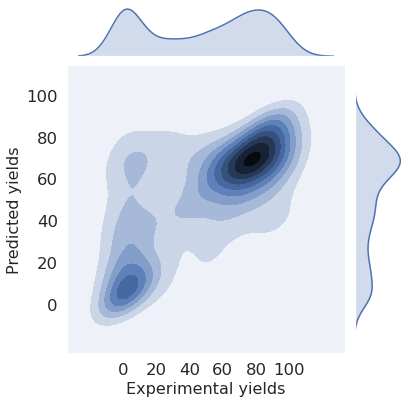

In [445]:
h = sns.jointplot("Yields", "Global model", df_1, kind='kde')
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")

fig_path = 'images/random_split_dft_descriptors_test_size_0.2_full.png'
plt.savefig(fig_path)

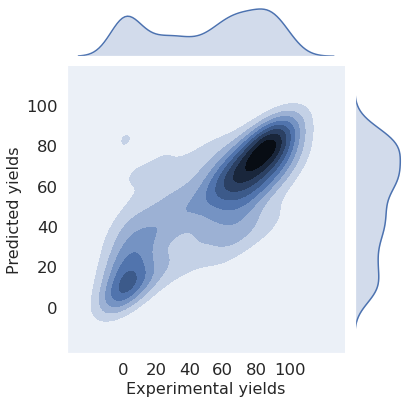

In [447]:

h = sns.jointplot("Yields", "Global model", df_2, kind='kde')
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_fp_descriptors_test_size_0.2_full.png')

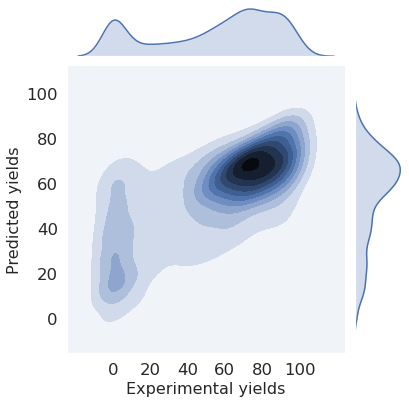

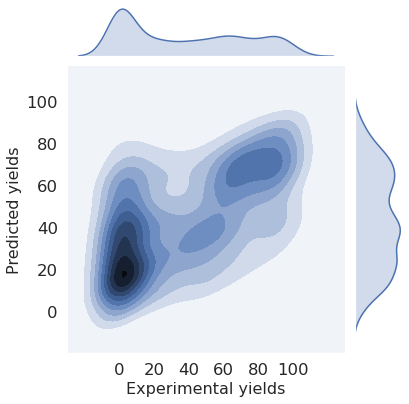

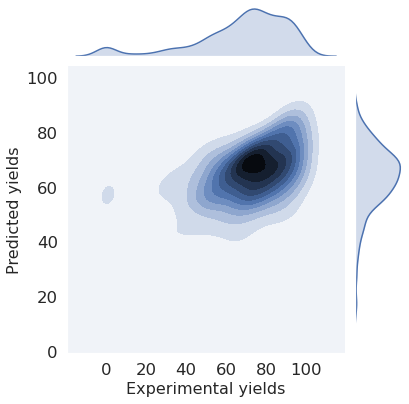

In [388]:
sns.set(font_scale=1.5)
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Global model", df_3, kind='kde')
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")

plt.savefig('images/random_split_rxnfp_descriptors_test_size_0.2_full.png')
fig_paths.append('images/random_split_rxnfp_descriptors_test_size_0.2_full.png')
rmse.append(mean_squared_error(df_3["Yields"], df_3["Global model"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Global model"]))
r2.append(r2_score(df_3["Yields"], df_3["Global model"]))


indices = np.where(df_3['Origin'] == "Optimisation")
df_3_optimisation = df_3[["Yields", "Global model"]].iloc[indices]

h = sns.jointplot("Yields", "Global model", df_3_optimisation, kind='kde')
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_rxnfp_descriptors_test_size_0.2_optimisation.png')
fig_paths.append('images/random_split_rxnfp_descriptors_test_size_0.2_optimisation.png')
rmse.append(mean_squared_error(df_3_optimisation["Yields"], df_3_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_3_optimisation["Yields"], df_3_optimisation["Global model"]))
r2.append(r2_score(df_3_optimisation["Yields"], df_3_optimisation["Global model"]))

indices = np.where(df_3['Origin'] == "Scope")
df_3_scope = df_3[["Yields", "Global model"]].iloc[indices]
h = sns.jointplot("Yields", "Global model", df_3_scope, kind='kde')
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_rxnfp_descriptors_test_size_0.2_scope.png')
fig_paths.append('images/random_split_rxnfp_descriptors_test_size_0.2_scope.png')
rmse.append(mean_squared_error(df_3_scope["Yields"], df_3_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_3_scope["Yields"], df_3_scope["Global model"]))
r2.append(r2_score(df_3_scope["Yields"], df_3_scope["Global model"]))

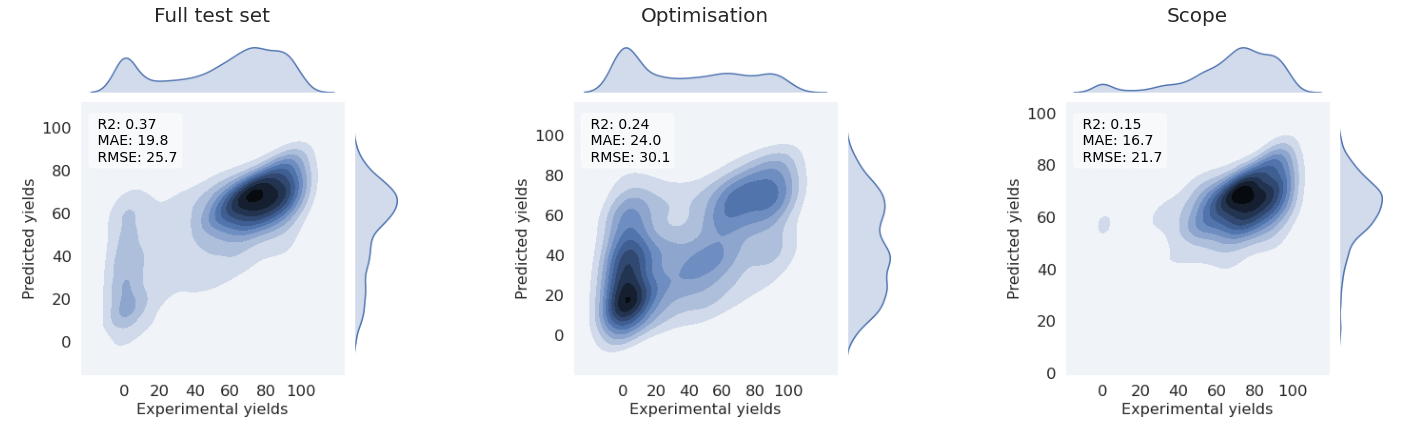

In [389]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_3['Origin'] == "Optimisation")
df_3_optimisation = df_3[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_3['Origin'] == "Scope")
df_3_scope = df_3[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(90, 140, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=25, fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


In [390]:
fig_paths = []
rmse = []
mae = []
r2 = []

fig_paths.append('images/random_split_dft_descriptors_test_size_0.2_full.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Global model"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Global model"]))
r2.append(r2_score(df_1["Yields"], df_1["Global model"]))


fig_paths.append('images/random_split_fp_descriptors_test_size_0.2_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))

fig_paths.append('images/random_split_rxnfp_descriptors_test_size_0.2_full.png')
rmse.append(mean_squared_error(df_3["Yields"],df_3["Global model"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Global model"]))
r2.append(r2_score(df_3["Yields"], df_3["Global model"]))


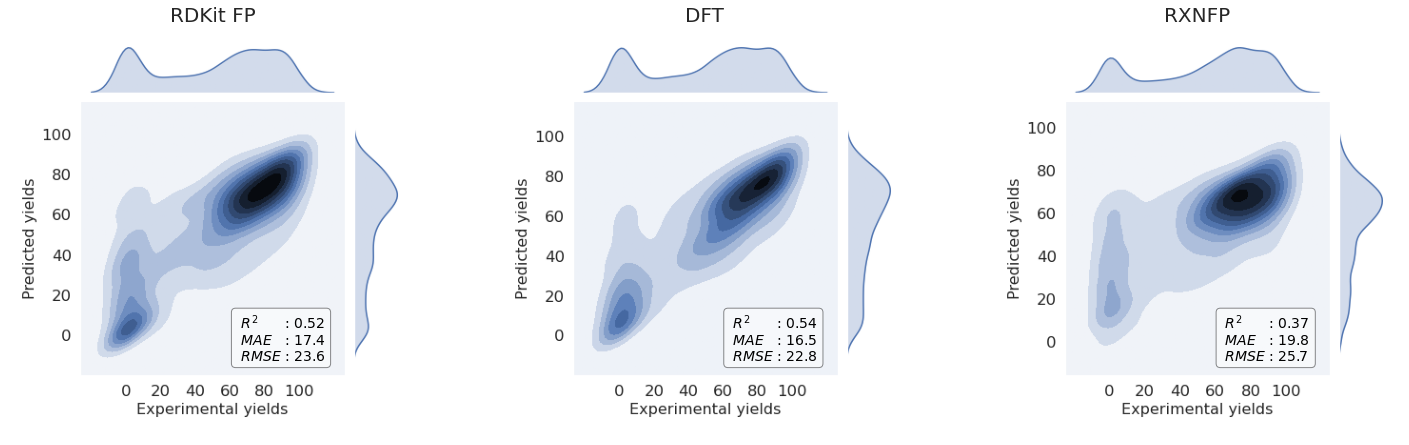

In [391]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    
    text = ax.text(240, 350, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=25, fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))

# 2. Substrate split

In [392]:
df_1 = pd.read_csv('results/substrate_split_fp_descriptors')
df_2 = pd.read_csv('results/substrate_split_dft_descriptors')
df_3 = pd.read_csv('results/substrate_split_rxnfp_descriptors')
#df_4 = pd.read_csv('results/substrate_split_hybrid_descriptors')


## FP descriptors 

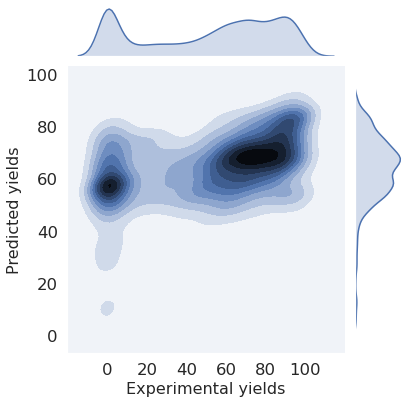

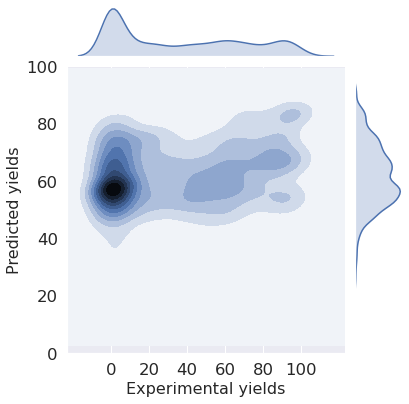

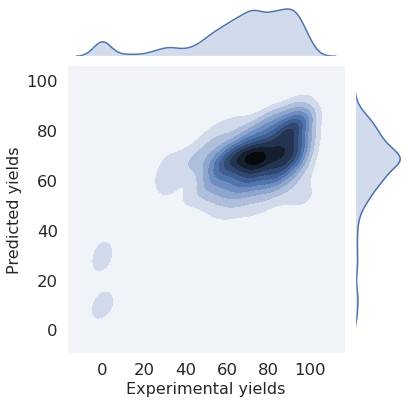

In [393]:
sns.set(font_scale=1.5)
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Global model", df_1, kind='kde')
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/substrate_split_fp_descriptors_full.png')
fig_paths.append('images/substrate_split_fp_descriptors_full.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Global model"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Global model"]))
r2.append(r2_score(df_1["Yields"], df_1["Global model"]))


indices = np.where(df_1['Origin'] == "optimisation")
df_1_optimisation = df_1[["Yields", "Global model"]].iloc[indices]
h = sns.jointplot("Yields", "Global model", df_1_optimisation, kind='kde')
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/substrate_split_fp_descriptors_optimisation.png')
fig_paths.append('images/substrate_split_fp_descriptors_optimisation.png')
rmse.append(mean_squared_error(df_1_optimisation["Yields"], df_1_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_1_optimisation["Yields"], df_1_optimisation["Global model"]))
r2.append(r2_score(df_1_optimisation["Yields"], df_1_optimisation["Global model"]))

indices = np.where(df_1['Origin'] == "scope")
df_1_scope = df_1[["Yields", "Global model"]].iloc[indices]
h = sns.jointplot("Yields", "Global model", df_1_scope, kind='kde')
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/substrate_split_fp_descriptors_scope.png')
fig_paths.append('images/substrate_split_fp_descriptors_scope.png')
rmse.append(mean_squared_error(df_1_scope["Yields"], df_1_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_1_scope["Yields"], df_1_scope["Global model"]))
r2.append(r2_score(df_1_scope["Yields"], df_1_scope["Global model"]))

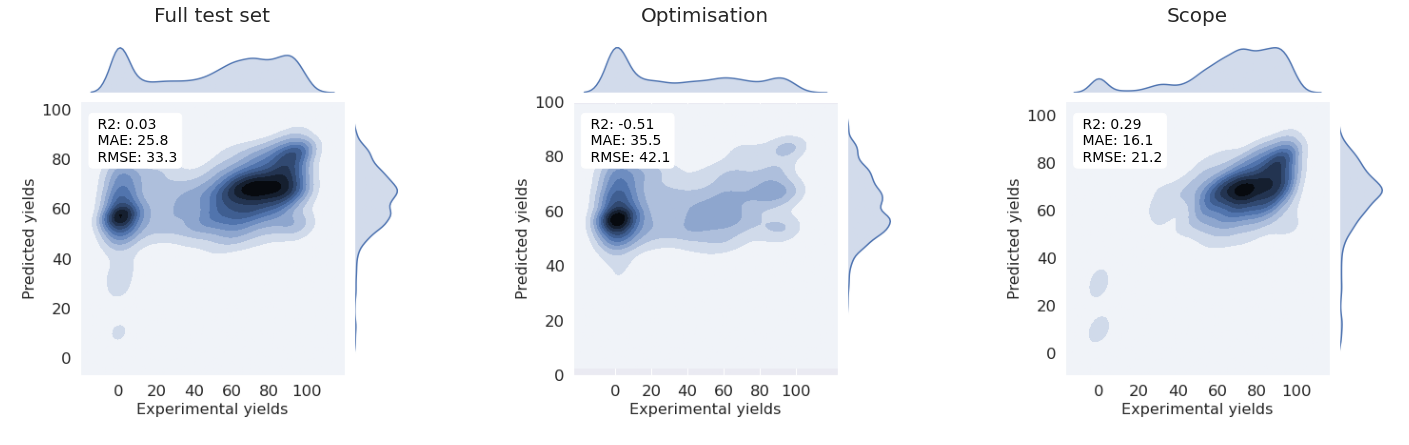

In [394]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)
sns.set(font_scale=1)

indices = np.where(df_1['Origin'] == "optimisation")
df_1_optimisation = df_1[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_1['Origin'] == "scope")
df_1_scope = df_1[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(90, 140, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=25, fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=1))


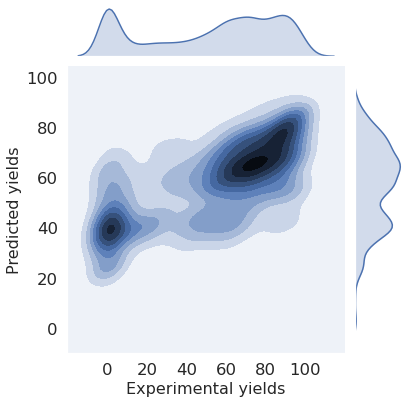

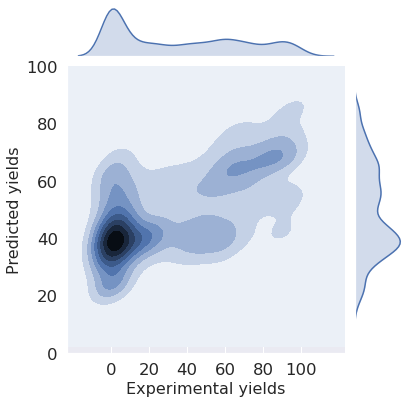

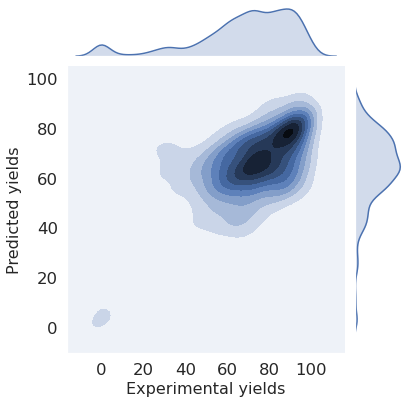

In [395]:
sns.set(font_scale=1.5)
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Global model", df_2, kind='kde')
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/substrate_split_dft_descriptors_full.png')
fig_paths.append('images/substrate_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))


indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]
h = sns.jointplot("Yields", "Global model", df_2_optimisation, kind='kde')
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/substrate_split_dft_descriptors_optimisation.png')
fig_paths.append('images/substrate_split_dft_descriptors_optimisation.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]
h = sns.jointplot("Yields", "Global model", df_2_scope, kind='kde')
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/substrate_split_dft_descriptors_scope.png')
fig_paths.append('images/substrate_split_dft_descriptors_scope.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Global model"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Global model"]))

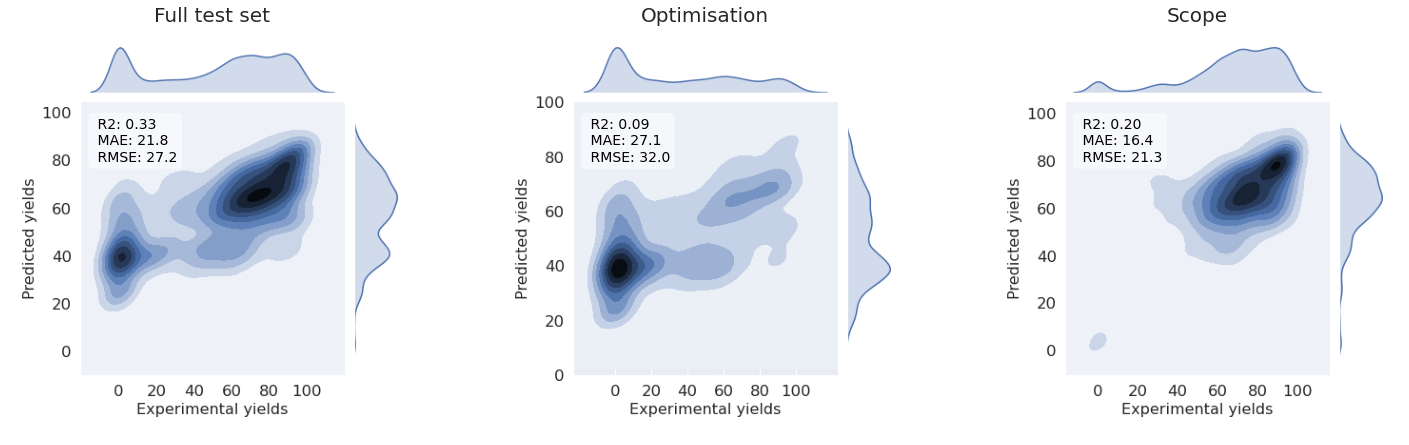

In [396]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(90, 140, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=25, fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


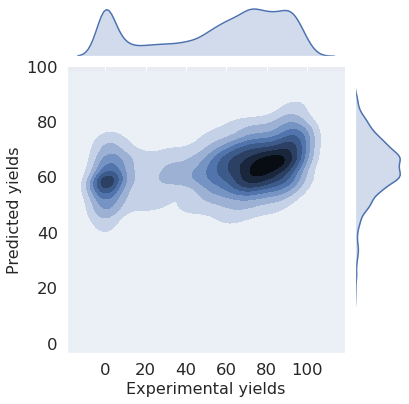

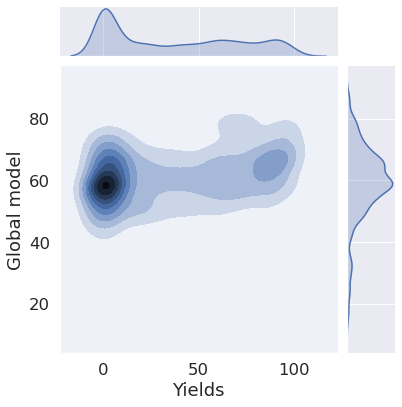

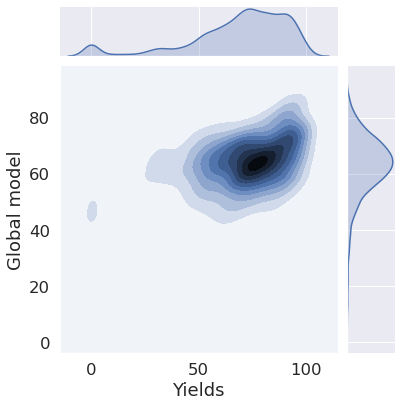

In [397]:
sns.set(font_scale=1.5)
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Global model", df_3, kind='kde')
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/substrate_split_rxnfp_descriptors_full.png')
fig_paths.append('images/substrate_split_rxnfp_descriptors_full.png')
rmse.append(mean_squared_error(df_3["Yields"], df_3["Global model"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Global model"]))
r2.append(r2_score(df_3["Yields"], df_3["Global model"]))


indices = np.where(df_3['Origin'] == "Optimisation")
df_3_optimisation = df_3[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_3_optimisation, kind='kde')
plt.savefig('images/substrate_split_rxnfp_descriptors_optimisation.png')
fig_paths.append('images/substrate_split_rxnfp_descriptors_optimisation.png')
rmse.append(mean_squared_error(df_3_optimisation["Yields"], df_3_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_3_optimisation["Yields"], df_3_optimisation["Global model"]))
r2.append(r2_score(df_3_optimisation["Yields"], df_3_optimisation["Global model"]))

indices = np.where(df_3['Origin'] == "Scope")
df_3_scope = df_3[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_3_scope, kind='kde')
plt.savefig('images/substrate_split_rxnfp_descriptors_scope.png')
fig_paths.append('images/substrate_split_rxnfp_descriptors_scope.png')
rmse.append(mean_squared_error(df_3_scope["Yields"], df_3_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_3_scope["Yields"], df_3_scope["Global model"]))
r2.append(r2_score(df_3_scope["Yields"], df_3_scope["Global model"]))

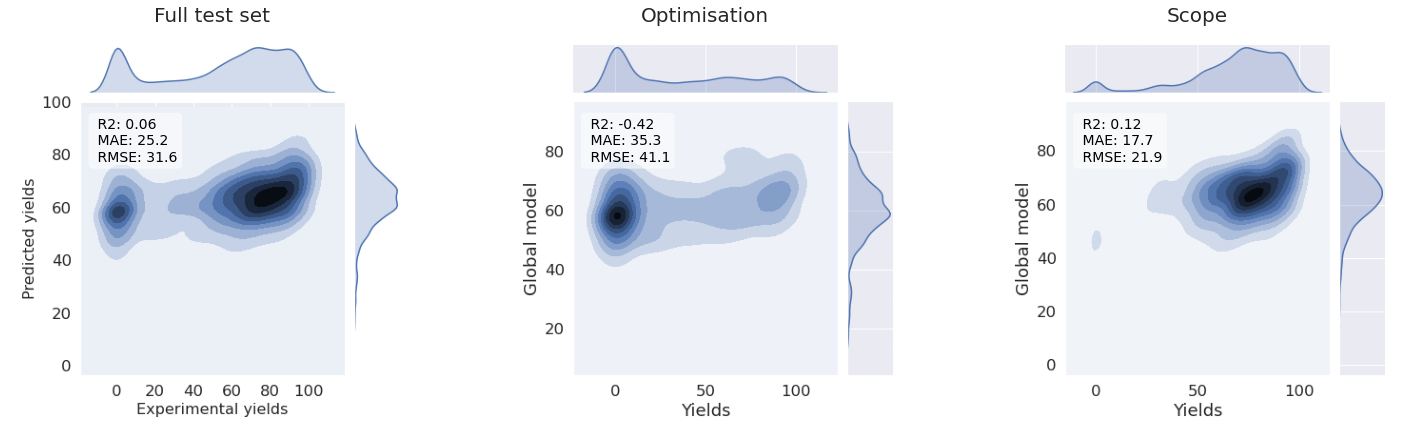

In [398]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_3['Origin'] == "optimisation")
df_3_optimisation = df_3[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_3['Origin'] == "scope")
df_3_scope = df_3[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(90, 140, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=25, fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


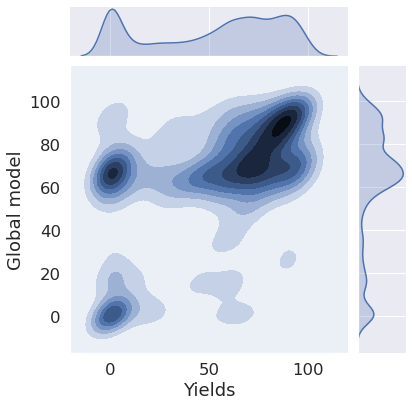

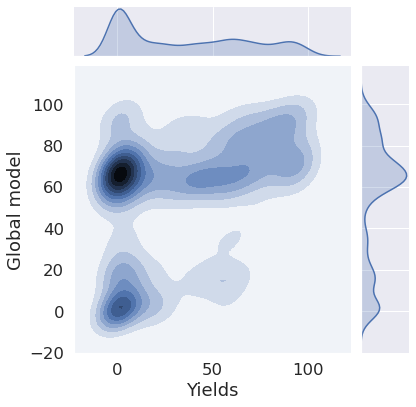

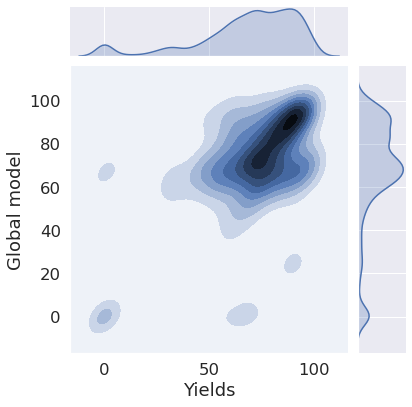

In [399]:
sns.set(font_scale=1.5)
fig_paths = []
rmse = []
mae = []
r2 = []

sns.jointplot("Yields", "Global model", df_4, kind='kde')
plt.savefig('images/substrate_split_hybrid_descriptors_full.png')
fig_paths.append('images/substrate_split_hybrid_descriptors_full.png')
rmse.append(mean_squared_error(df_4["Yields"], df_4["Global model"])**0.5)
mae.append(mean_absolute_error(df_4["Yields"], df_4["Global model"]))
r2.append(r2_score(df_4["Yields"], df_4["Global model"]))


indices = np.where(df_4['Origin'] == "optimisation")
df_4_optimisation = df_4[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_4_optimisation, kind='kde')
plt.savefig('images/substrate_split_hybrid_descriptors_optimisation.png')
fig_paths.append('images/substrate_split_hybrid_descriptors_optimisation.png')
rmse.append(mean_squared_error(df_4_optimisation["Yields"], df_4_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_4_optimisation["Yields"], df_4_optimisation["Global model"]))
r2.append(r2_score(df_4_optimisation["Yields"], df_4_optimisation["Global model"]))

indices = np.where(df_4['Origin'] == "scope")
df_4_scope = df_4[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_4_scope, kind='kde')
plt.savefig('images/substrate_split_hybrid_descriptors_scope.png')
fig_paths.append('images/substrate_split_hybrid_descriptors_scope.png')
rmse.append(mean_squared_error(df_4_scope["Yields"], df_4_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_4_scope["Yields"], df_4_scope["Global model"]))
r2.append(r2_score(df_4_scope["Yields"], df_4_scope["Global model"]))

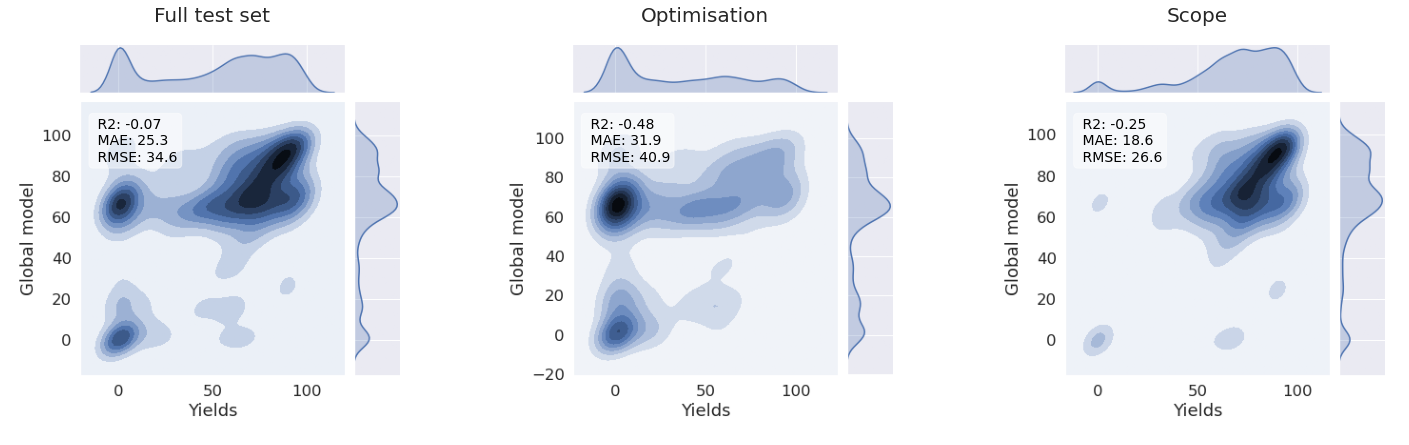

In [400]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_4['Origin'] == "optimisation")
df_4_optimisation = df_4[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_4['Origin'] == "scope")
df_4_scope = df_4[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(90, 140, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=25, fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


In [296]:
df_2 = pd.read_csv('results/substrate_split_dft_descriptors_classification')

In [297]:
indices = np.where(df_2['Origin'] == "optimisation")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]
fpr, tpr, thresholds = metrics.roc_curve(1 * df_2_scope["Yields"], df_2_scope["Global model"])
print(metrics.auc(fpr, tpr))

0.7347995030453116


(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

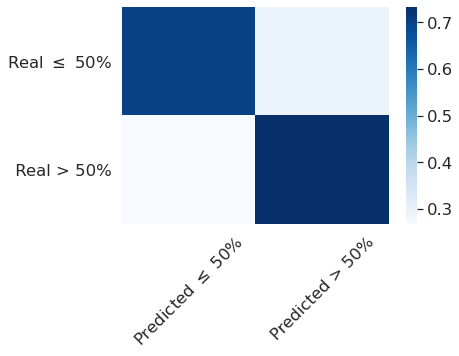

In [438]:
df = pd.DataFrame(data=cm, index=["Real $\leq$ 50%", " Real > 50%"], columns=["Predicted $\leq$ 50%", "Predicted > 50%"])
sns.heatmap(df, cmap="Blues")
plt.xticks(rotation=45) 
plt.yticks(rotation=0) 

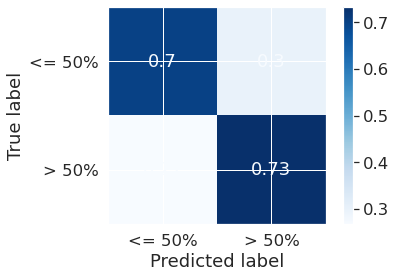

In [285]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
predictions = df_2_scope["Global model"]>50
cm = confusion_matrix(1 * df_2_scope["Yields"]>50, predictions, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["<= 50%", "> 50%"])
disp.plot(cmap="Blues")

plt.show()

In [401]:
from sklearn.metrics import accuracy_score, auc
from sklearn import metrics 

fig_paths = []
rmse = []
mae = []
r2 = []
aucs = []

fig_paths.append('images/substrate_split_fp_descriptors_full.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Global model"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Global model"]))
r2.append(metrics.r2_score(df_1["Yields"], df_1["Global model"]))

indices = np.where(df_1['Origin'] == "scope")
df_1_scope = df_1[["Yields", "Global model"]].iloc[indices]

fpr, tpr, thresholds = metrics.roc_curve(1 * df_1_scope["Yields"]>50, 0.01 * df_1_scope["Global model"])
#r2.append(metrics.auc(fpr, tpr))


fig_paths.append('images/substrate_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(metrics.r2_score(df_2["Yields"], df_2["Global model"]))

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]

fpr, tpr, thresholds = metrics.roc_curve(1 * df_2_scope["Yields"]>50, 0.01 * df_2_scope["Global model"])
#r2.append(metrics.auc(fpr, tpr))

fig_paths.append('images/substrate_split_rxnfp_descriptors_full.png')
rmse.append(mean_squared_error(df_3["Yields"],df_3["Global model"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Global model"]))
r2.append(metrics.r2_score(df_3["Yields"], df_3["Global model"]))

#r2.append(metrics.auc(fpr, tpr))

indices = np.where(df_3['Origin'] == "Scope")
df_3_scope = df_3[["Yields", "Global model"]].iloc[indices]
#r2.append(metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(1 * df_3_scope["Yields"]>50, 0.01 * df_3_scope["Global model"])
#r2.append(metrics.auc(fpr, tpr))


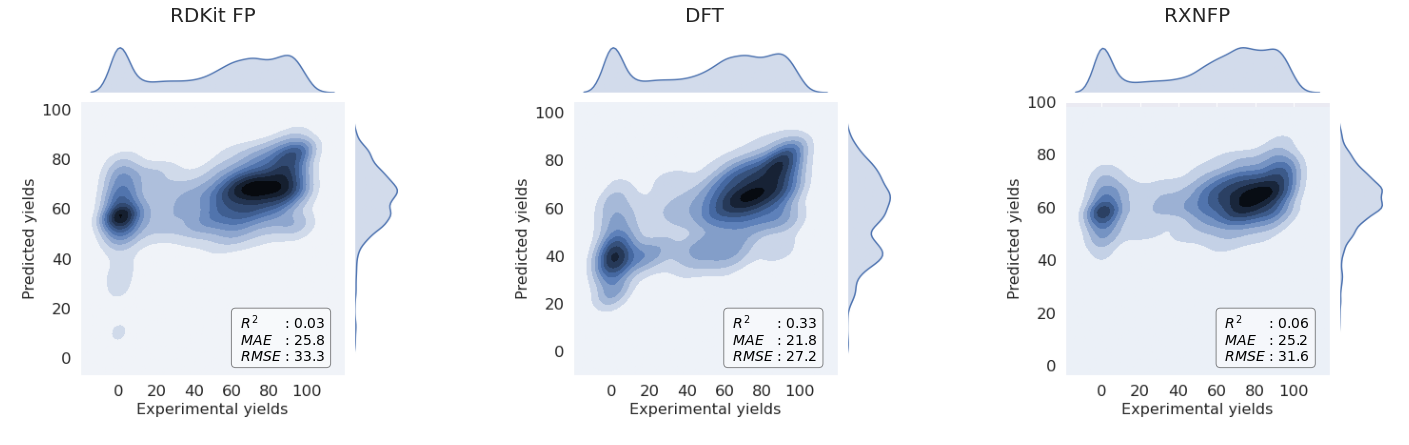

In [402]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})

    text = ax.text(240, 350, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=25, fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))

# 3. DOI split

In [404]:
df_1 = pd.read_csv('results/doi_split_fp_descriptors')
df_2 = pd.read_csv('results/doi_split_dft_descriptors')
df_3 = pd.read_csv('results/doi_split_rxnfp_descriptors')

## FP descriptors 

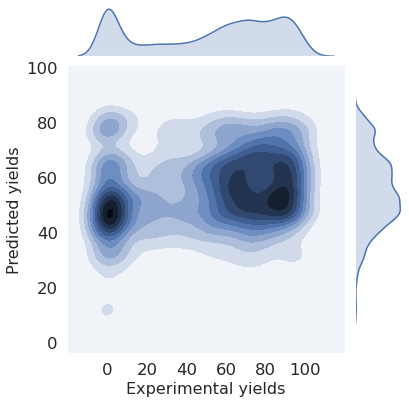

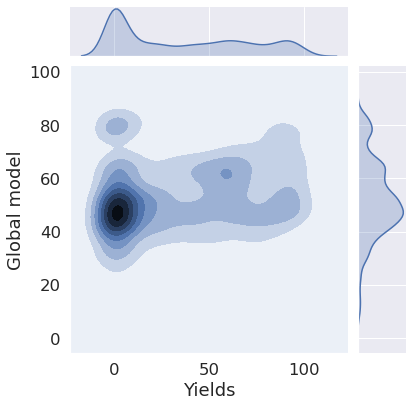

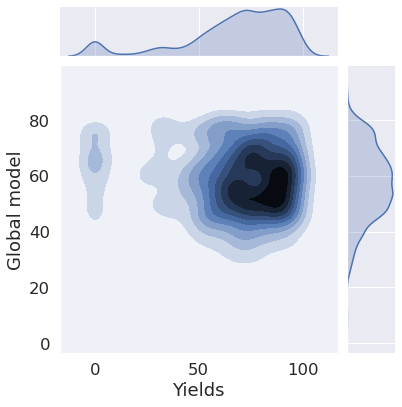

In [405]:
sns.set(font_scale=1.5)
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Global model", df_1, kind='kde')
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/doi_split_fp_descriptors_full.png')
fig_paths.append('images/doi_split_fp_descriptors_full.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Global model"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Global model"]))
r2.append(r2_score(df_1["Yields"], df_1["Global model"]))


indices = np.where(df_1['Origin'] == "optimisation")
df_1_optimisation = df_1[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_1_optimisation, kind='kde')
plt.savefig('images/doi_split_fp_descriptors_optimisation.png')
fig_paths.append('images/doi_split_fp_descriptors_optimisation.png')
rmse.append(mean_squared_error(df_1_optimisation["Yields"], df_1_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_1_optimisation["Yields"], df_1_optimisation["Global model"]))
r2.append(r2_score(df_1_optimisation["Yields"], df_1_optimisation["Global model"]))

indices = np.where(df_1['Origin'] == "scope")
df_1_scope = df_1[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_1_scope, kind='kde')
plt.savefig('images/doi_split_fp_descriptors_scope.png')
fig_paths.append('images/doi_split_fp_descriptors_scope.png')
rmse.append(mean_squared_error(df_1_scope["Yields"], df_1_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_1_scope["Yields"], df_1_scope["Global model"]))
r2.append(r2_score(df_1_scope["Yields"], df_1_scope["Global model"]))

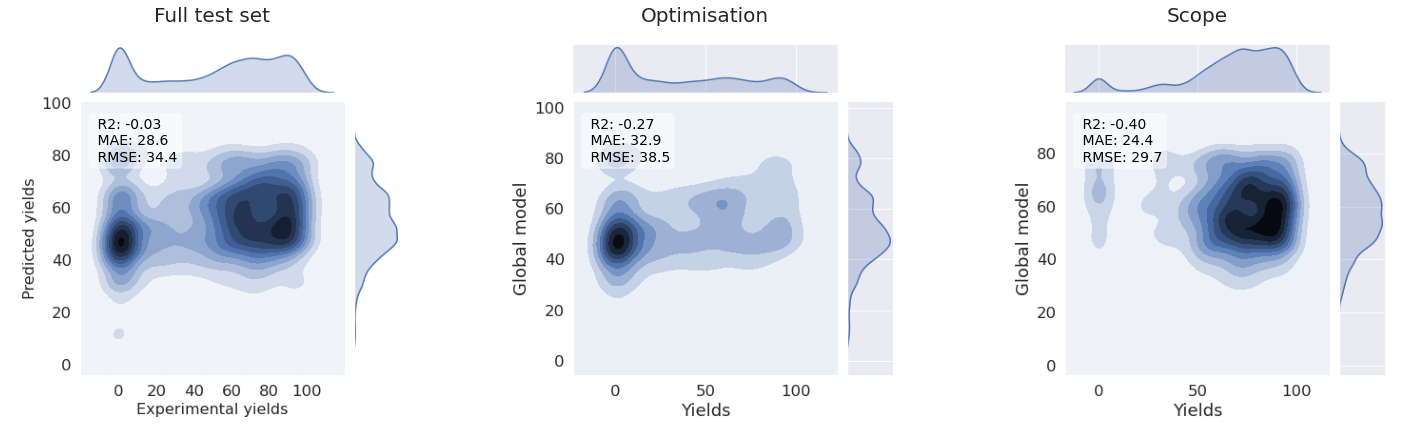

In [406]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_1['Origin'] == "optimisation")
df_1_optimisation = df_1[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_1['Origin'] == "scope")
df_1_scope = df_1[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(90, 140, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=25, fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


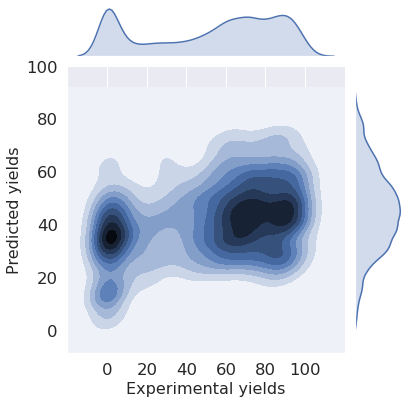

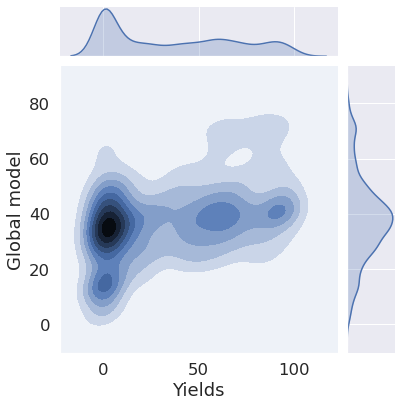

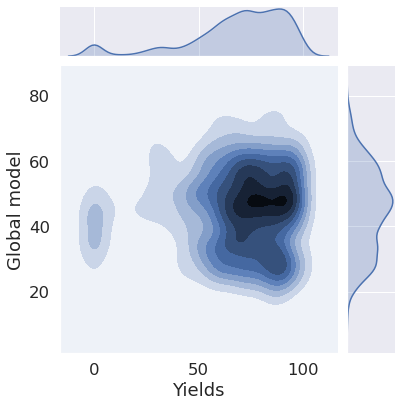

In [413]:
sns.set(font_scale=1.5)
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Global model", df_2, kind='kde')
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/doi_split_dft_descriptors_full.png')
fig_paths.append('images/doi_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))


indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_2_optimisation, kind='kde')
plt.savefig('images/doi_split_dft_descriptors_optimisation.png')
fig_paths.append('images/doi_split_dft_descriptors_optimisation.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_2_scope, kind='kde')
plt.savefig('images/doi_split_dft_descriptors_scope.png')
fig_paths.append('images/doi_split_dft_descriptors_scope.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Global model"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Global model"]))

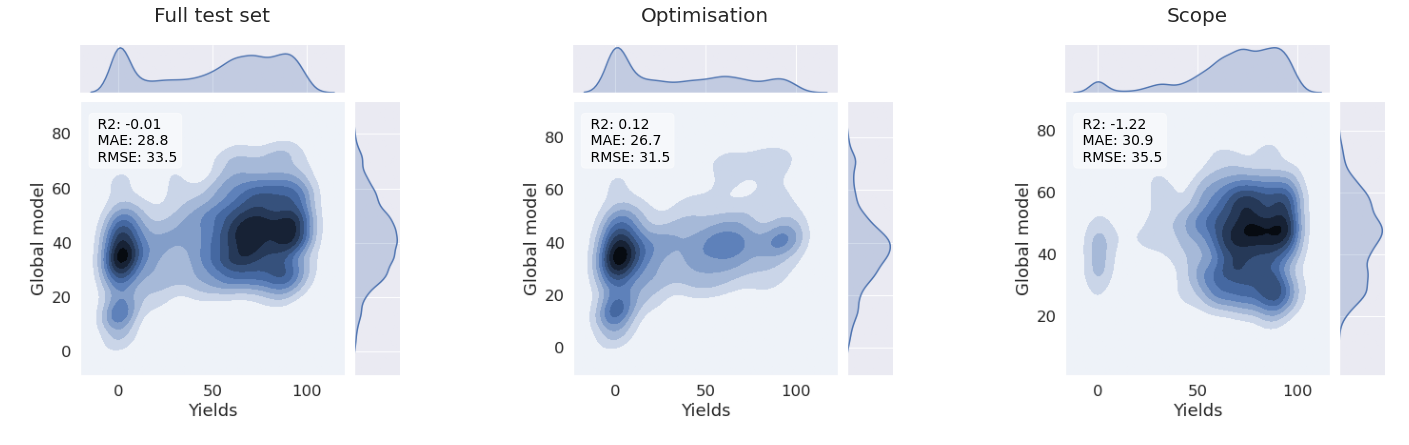

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(90, 140, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=25, fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


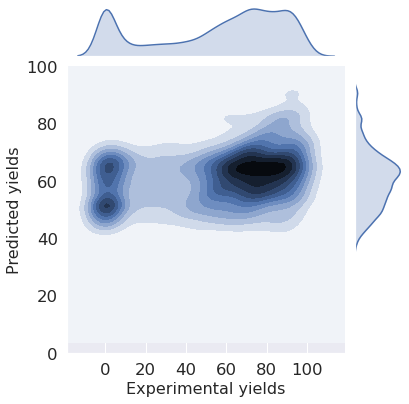

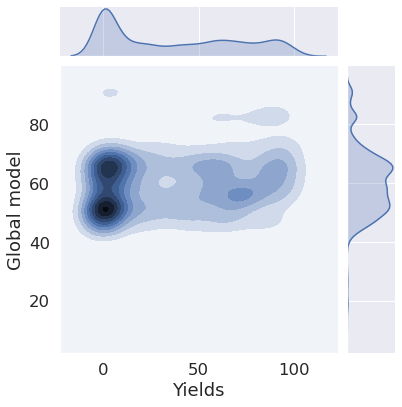

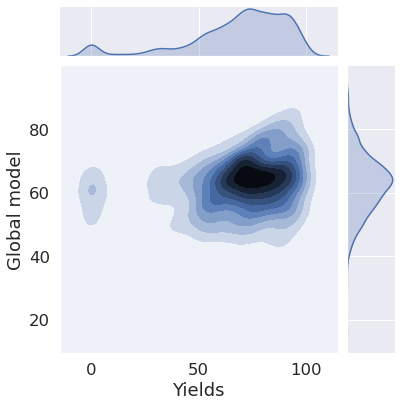

In [408]:
sns.set(font_scale=1.5)
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Global model", df_3, kind='kde')
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/doi_split_rxnfp_descriptors_full.png')
fig_paths.append('images/doi_split_rxnfp_descriptors_full.png')
rmse.append(mean_squared_error(df_3["Yields"], df_3["Global model"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Global model"]))
r2.append(r2_score(df_3["Yields"], df_3["Global model"]))


indices = np.where(df_3['Origin'] == "Optimisation")
df_3_optimisation = df_3[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_3_optimisation, kind='kde')
plt.savefig('images/doi_split_rxnfp_descriptors_optimisation.png')
fig_paths.append('images/doi_split_rxnfp_descriptors_optimisation.png')
rmse.append(mean_squared_error(df_3_optimisation["Yields"], df_3_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_3_optimisation["Yields"], df_3_optimisation["Global model"]))
r2.append(r2_score(df_3_optimisation["Yields"], df_3_optimisation["Global model"]))

indices = np.where(df_3['Origin'] == "Scope")
df_3_scope = df_3[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_3_scope, kind='kde')
plt.savefig('images/doi_split_rxnfp_descriptors_scope.png')
fig_paths.append('images/doi_split_rxnfp_descriptors_scope.png')
rmse.append(mean_squared_error(df_3_scope["Yields"], df_3_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_3_scope["Yields"], df_3_scope["Global model"]))
r2.append(r2_score(df_3_scope["Yields"], df_3_scope["Global model"]))

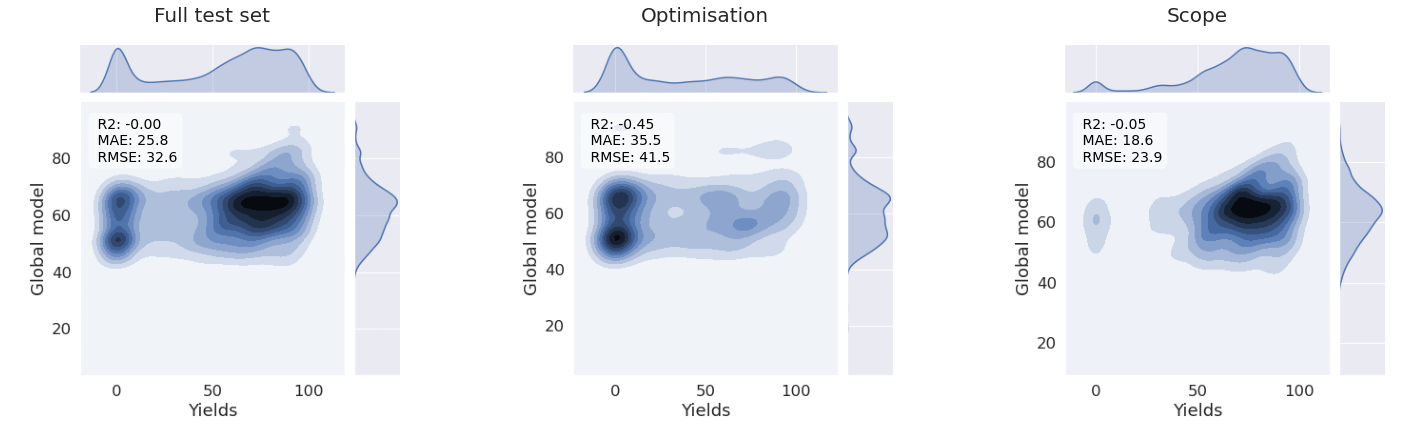

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_3['Origin'] == "optimisation")
df_3_optimisation = df_3[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_3['Origin'] == "scope")
df_3_scope = df_3[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(90, 140, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=25, fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


In [414]:
fig_paths = []
rmse = []
mae = []
r2 = []

fig_paths.append('images/doi_split_fp_descriptors_full.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Global model"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Global model"]))
r2.append(r2_score(df_1["Yields"], df_1["Global model"]))


fig_paths.append('images/doi_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))

fig_paths.append('images/doi_split_rxnfp_descriptors_full.png')
rmse.append(mean_squared_error(df_3["Yields"],df_3["Global model"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Global model"]))
r2.append(r2_score(df_3["Yields"], df_3["Global model"]))

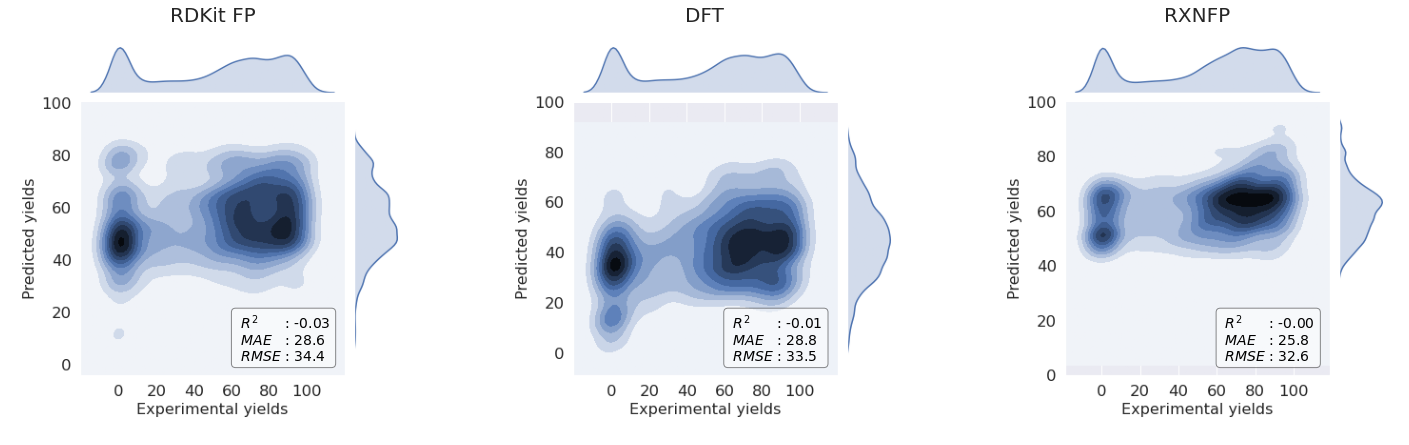

In [415]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    text = ax.text(240, 350, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=25, fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))

# 4. Mechanism split

In [422]:
df_1 = pd.read_csv('results/mechanisms_split_fp_descriptors')
df_2 = pd.read_csv('results/mechanisms_split_dft_descriptors')
df_3 = pd.read_csv('results/mechanisms_split_rxnfp_descriptors')

## FP descriptors 

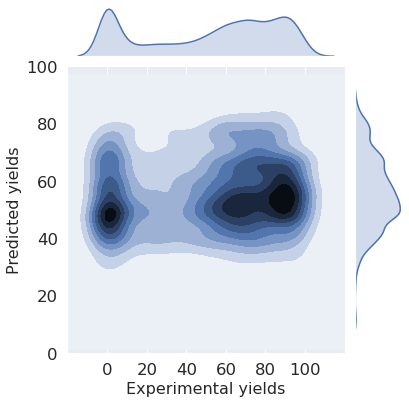

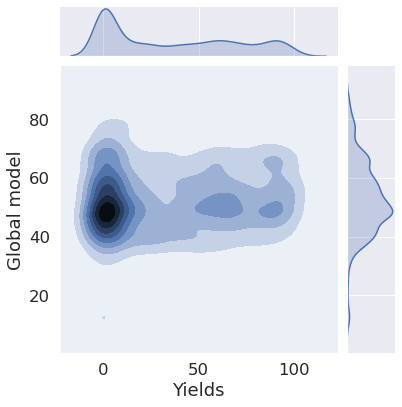

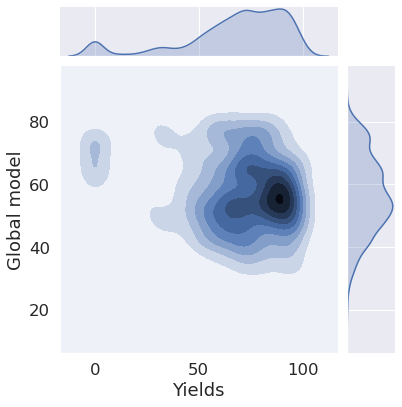

In [417]:
sns.set(font_scale=1.5)
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Global model", df_1, kind='kde')
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/mechanism_split_fp_descriptors_full.png')
fig_paths.append('images/mechanism_split_fp_descriptors_full.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Global model"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Global model"]))
r2.append(r2_score(df_1["Yields"], df_1["Global model"]))


indices = np.where(df_1['Origin'] == "optimisation")
df_1_optimisation = df_1[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_1_optimisation, kind='kde')
plt.savefig('images/mechanism_split_fp_descriptors_optimisation.png')
fig_paths.append('images/mechanism_split_fp_descriptors_optimisation.png')
rmse.append(mean_squared_error(df_1_optimisation["Yields"], df_1_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_1_optimisation["Yields"], df_1_optimisation["Global model"]))
r2.append(r2_score(df_1_optimisation["Yields"], df_1_optimisation["Global model"]))

indices = np.where(df_1['Origin'] == "scope")
df_1_scope = df_1[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_1_scope, kind='kde')
plt.savefig('images/mechanism_split_fp_descriptors_scope.png')
fig_paths.append('images/mechanism_split_fp_descriptors_scope.png')
rmse.append(mean_squared_error(df_1_scope["Yields"], df_1_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_1_scope["Yields"], df_1_scope["Global model"]))
r2.append(r2_score(df_1_scope["Yields"], df_1_scope["Global model"]))

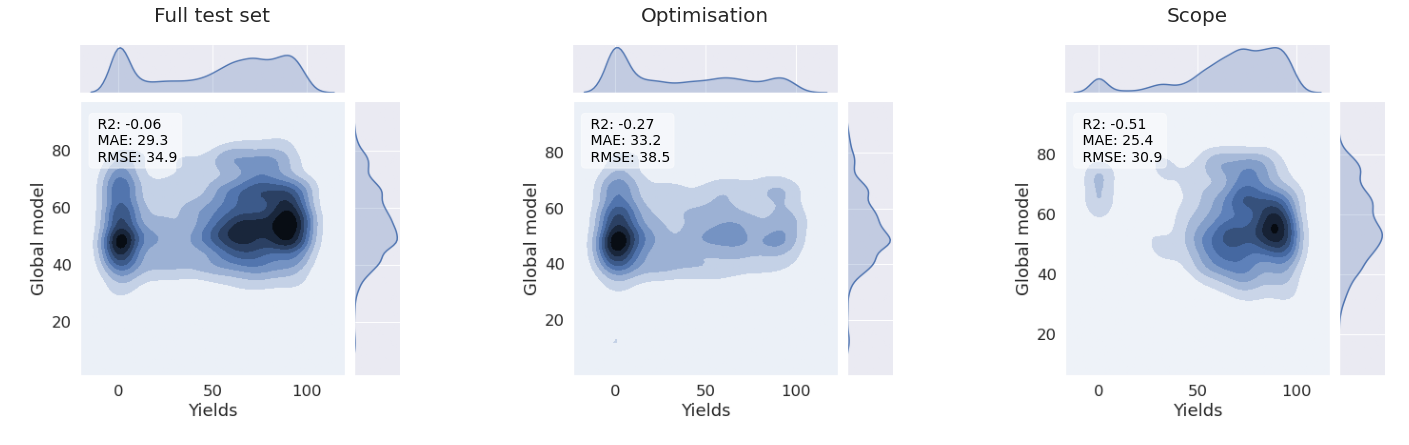

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_1['Origin'] == "optimisation")
df_1_optimisation = df_1[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_1['Origin'] == "scope")
df_1_scope = df_1[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(90, 140, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=25, fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


In [ ]:
sns.set(font_scale=1.5)
fig_paths = []
rmse = []
mae = []
r2 = []

h= sns.jointplot("Yields", "Global model", df_2, kind='kde')
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/mechanism_split_dft_descriptors_full.png')
fig_paths.append('images/mechanism_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))


indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_2_optimisation, kind='kde')
plt.savefig('images/mechanism_split_dft_descriptors_optimisation.png')
fig_paths.append('images/mechanism_split_dft_descriptors_optimisation.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_2_scope, kind='kde')
plt.savefig('images/mechanism_split_dft_descriptors_scope.png')
fig_paths.append('images/mechanism_split_dft_descriptors_scope.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Global model"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Global model"]))

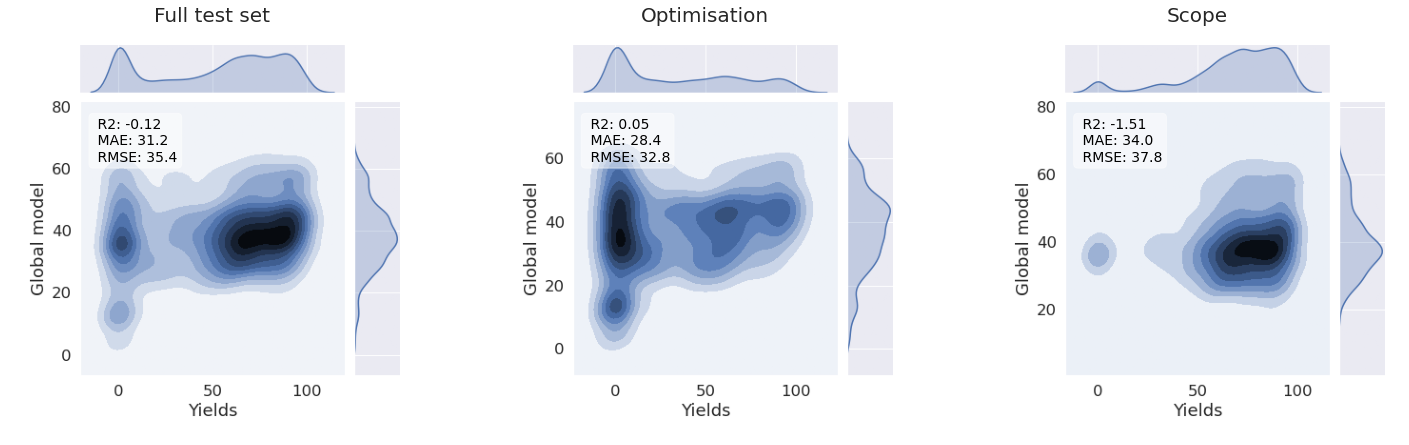

In [95]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(90, 140, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=25, fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


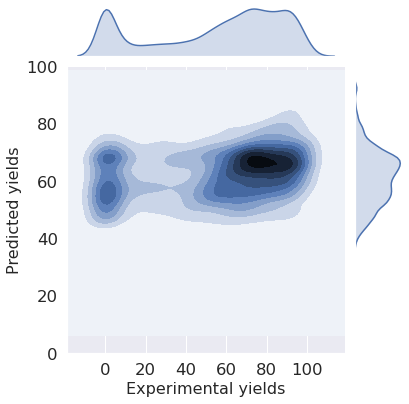

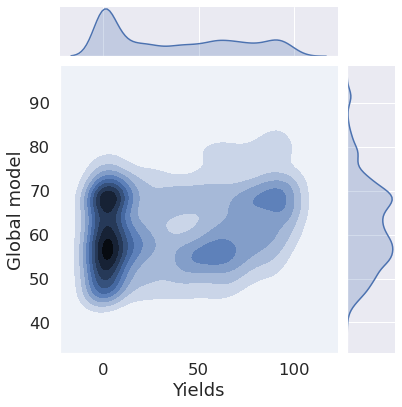

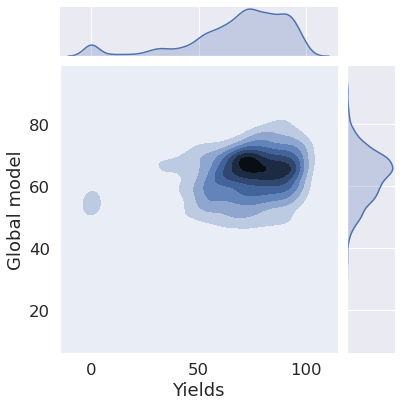

In [428]:
sns.set(font_scale=1.5)
sns.set_style()
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Global model", df_3, kind='kde')
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/mechanism_split_rxnfp_descriptors_full.png')
fig_paths.append('images/mechanism_split_rxnfp_descriptors_full.png')
rmse.append(mean_squared_error(df_3["Yields"], df_3["Global model"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Global model"]))
r2.append(r2_score(df_3["Yields"], df_3["Global model"]))


indices = np.where(df_3['Origin'] == "Optimisation")
df_3_optimisation = df_3[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_3_optimisation, kind='kde')
plt.savefig('images/mechanism_split_rxnfp_descriptors_optimisation.png')
fig_paths.append('images/mechanism_split_rxnfp_descriptors_optimisation.png')
rmse.append(mean_squared_error(df_3_optimisation["Yields"], df_3_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_3_optimisation["Yields"], df_3_optimisation["Global model"]))
r2.append(r2_score(df_3_optimisation["Yields"], df_3_optimisation["Global model"]))

indices = np.where(df_3['Origin'] == "Scope")
df_3_scope = df_3[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_3_scope, kind='kde')
plt.savefig('images/mechanism_split_rxnfp_descriptors_scope.png')
fig_paths.append('images/mechanism_split_rxnfp_descriptors_scope.png')
rmse.append(mean_squared_error(df_3_scope["Yields"], df_3_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_3_scope["Yields"], df_3_scope["Global model"]))
r2.append(r2_score(df_3_scope["Yields"], df_3_scope["Global model"]))

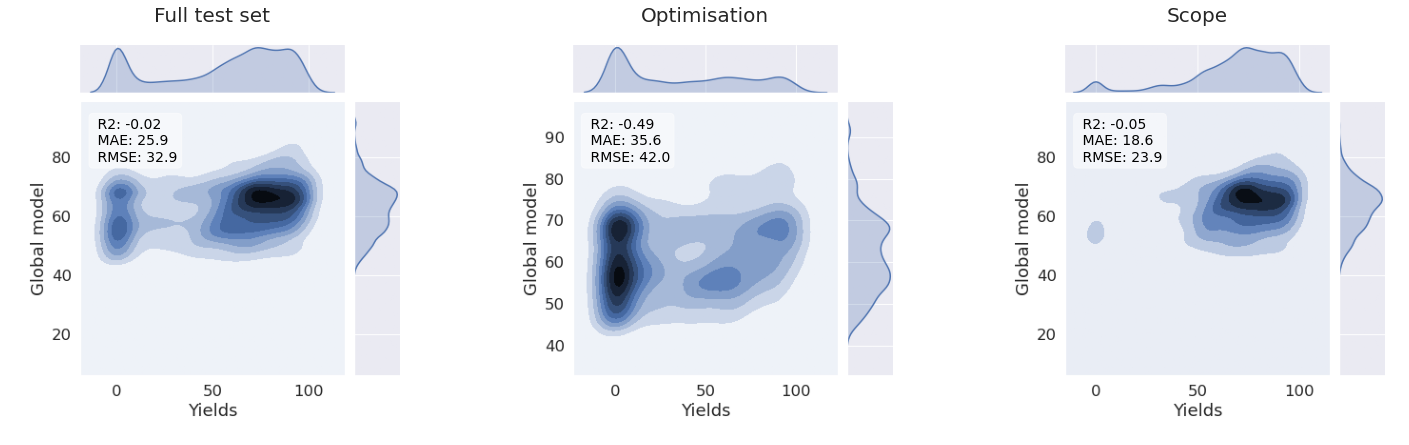

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_3['Origin'] == "optimisation")
df_3_optimisation = df_3[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_3['Origin'] == "scope")
df_3_scope = df_3[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(90, 140, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=25, fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


In [429]:
fig_paths = []
rmse = []
mae = []
r2 = []

fig_paths.append('images/mechanism_split_fp_descriptors_full.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Global model"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Global model"]))
r2.append(r2_score(df_1["Yields"], df_1["Global model"]))


fig_paths.append('images/mechanism_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))

fig_paths.append('images/mechanism_split_rxnfp_descriptors_full.png')
rmse.append(mean_squared_error(df_3["Yields"],df_3["Global model"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Global model"]))
r2.append(r2_score(df_3["Yields"], df_3["Global model"]))

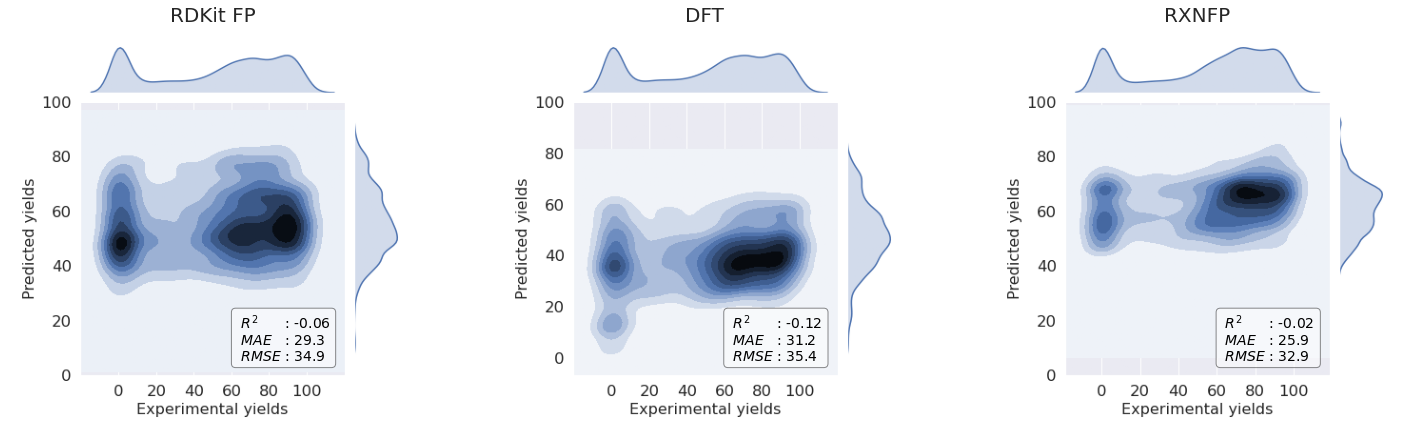

In [430]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    text = ax.text(240, 350, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=25, fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))

# 5. Training set size influence 

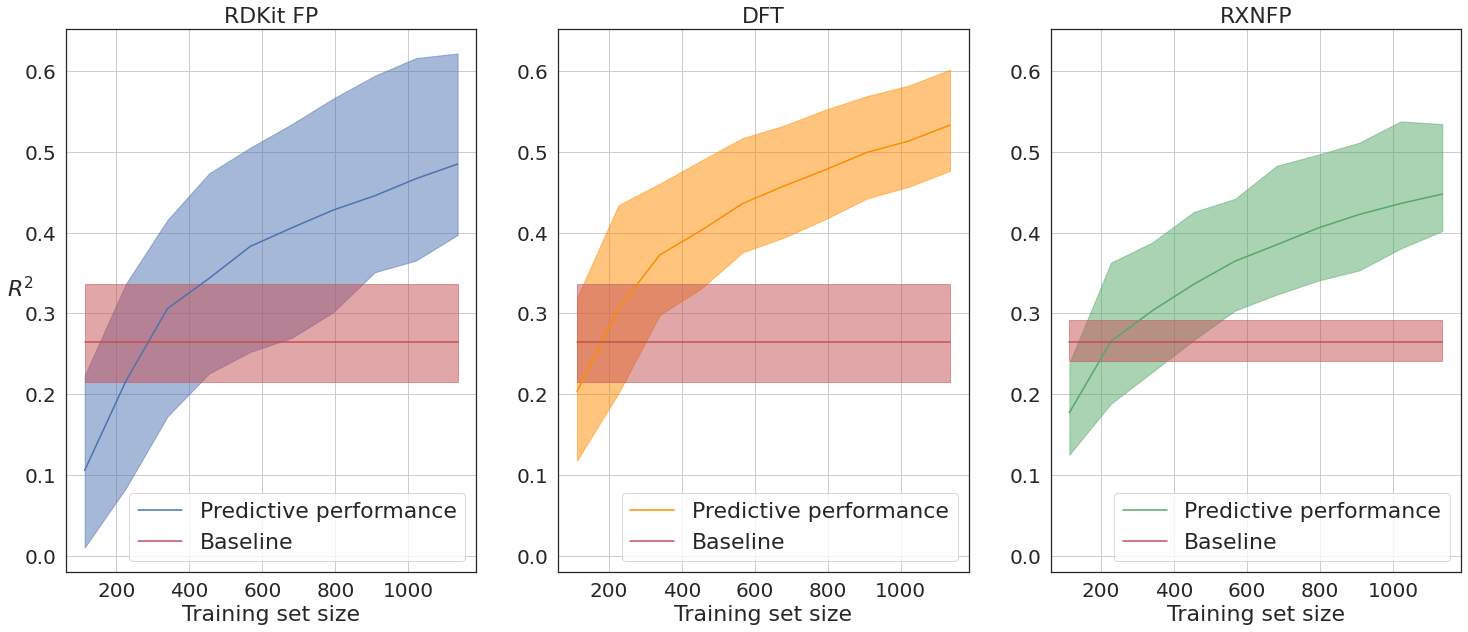

In [344]:
sns.set_style("white")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 10), sharey=True)
df_1 = pd.read_csv('results/training_size_influence_fp_descriptors')
df_2 = pd.read_csv('results/training_size_influence_dft_descriptors')
df_3 = pd.read_csv('results/training_size_influence_rxnfp_descriptors')
dfs = [df_1, df_2, df_3]
origins = ["RDKit FP", "DFT", "RXNFP",]
colors = ['b', 'darkorange', 'g']
for i, origin in enumerate(origins):
    ax = axes[i]
    df = dfs[i]
    sizes = df["Sizes"]
    metric_mean = df["Metric mean"]
    metric_lower = df["Metric lower"]
    metric_upper = df["Metric upper"]
    baseline_mean = df["Baseline mean"]
    baseline_lower = df["Baseline lower"]
    baseline_upper = df["Baseline upper"]
    ax.set_title(origins[i], fontsize=22)
    ax.plot(sizes, metric_mean, color= colors[i], label='Predictive performance')
    ax.fill_between(sizes, metric_lower, metric_upper, color = colors[i], alpha=0.5)
    
    #plt.plot(sizes_o, metric_mean_o, label='Model predictions_scope/opt_info')
    #plt.fill_between(sizes_o, metric_lower_o, metric_upper_o, alpha=0.5)
     
    ax.plot(sizes, baseline_mean, c='r', label='Baseline')
    ax.fill_between(sizes, baseline_lower, baseline_upper, color='r', alpha=0.5)
    ax.yaxis.set_tick_params(labelbottom=True)
    ax.legend(fontsize=22, loc=4)
    #ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
    ax.set_xlabel("Training set size", fontsize=22)
    if i==0:
        ax.set_ylabel("$R^2$", fontsize=22, rotation=0)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.grid(True)
    
plt.show()

# 6. Restricted chemical space: Suzuki

In [431]:
df_1 = pd.read_csv('results/random_split_fp_descriptors_test_size_0.2_mechanism_suzuki')
df_2 = pd.read_csv('results/random_split_dft_descriptors_test_size_0.2_mechanism_suzuki')
df_3 = pd.read_csv('results/random_split_rxnfp_descriptors_test_size_0.2_mechanism_suzuki')

## FP descriptors 

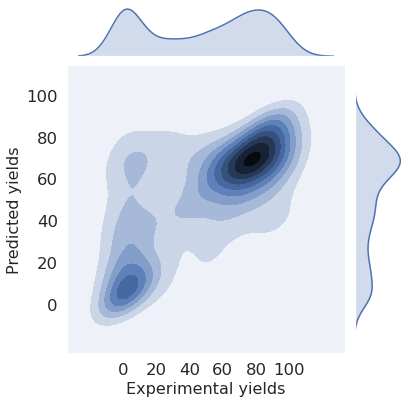

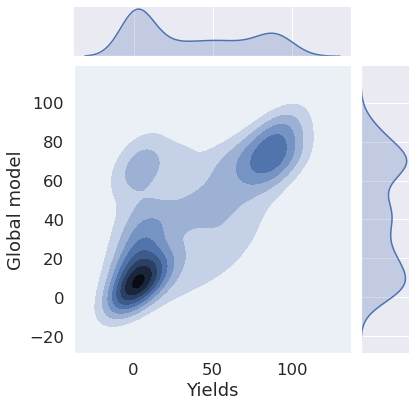

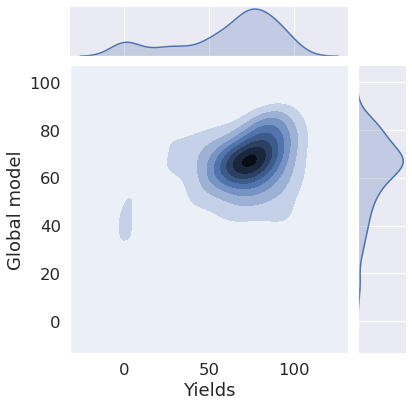

In [432]:
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Global model", df_1, kind='kde')
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_dft_descriptors_test_size_0.2_full_mechanism_suzuki.png')
fig_paths.append('images/random_split_dft_descriptors_test_size_0.2_full_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Global model"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Global model"]))
r2.append(r2_score(df_1["Yields"], df_1["Global model"]))


indices = np.where(df_1['Origin'] == "optimisation")
df_1_optimisation = df_1[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_1_optimisation, kind='kde')
plt.savefig('images/random_split_dft_descriptors_test_size_0.2_optimisation_mechanism_suzuki.png')
fig_paths.append('images/random_split_dft_descriptors_test_size_0.2_optimisation_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_1_optimisation["Yields"], df_1_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_1_optimisation["Yields"], df_1_optimisation["Global model"]))
r2.append(r2_score(df_1_optimisation["Yields"], df_1_optimisation["Global model"]))

indices = np.where(df_1['Origin'] == "scope")
df_1_scope = df_1[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_1_scope, kind='kde')
plt.savefig('images/random_split_dft_descriptors_test_size_0.2_scope_mechanism_suzuki.png')
fig_paths.append('images/random_split_dft_descriptors_test_size_0.2_scope_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_1_scope["Yields"], df_1_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_1_scope["Yields"], df_1_scope["Global model"]))
r2.append(r2_score(df_1_scope["Yields"], df_1_scope["Global model"]))

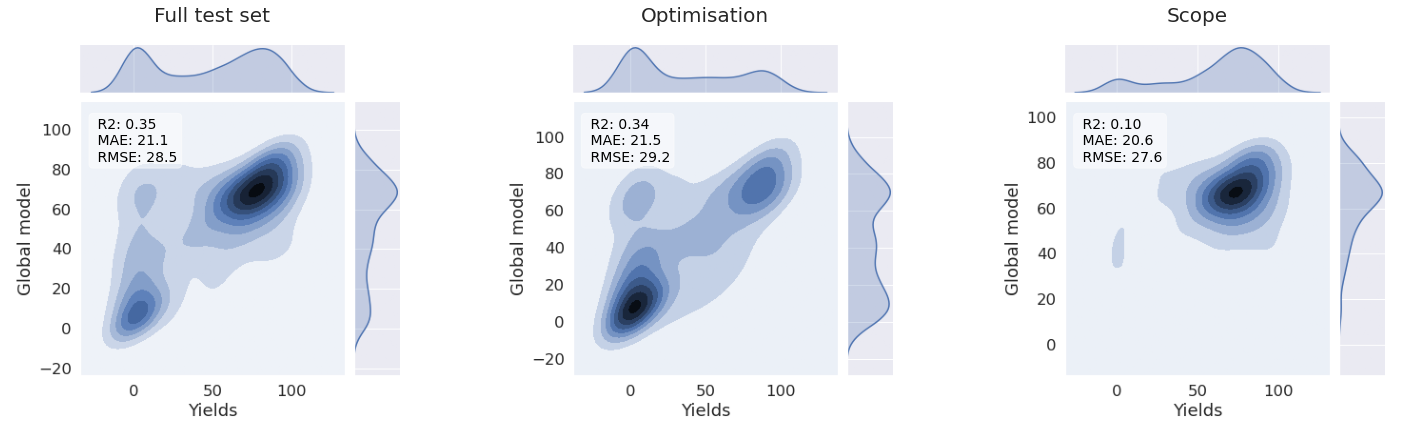

In [236]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_1['Origin'] == "optimisation")
df_1_optimisation = df_1[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_1['Origin'] == "scope")
df_1_scope = df_1[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    text = ax.text(90, 140, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=25, fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
                                         
    #plt.legend([' R2: {:.2f}'.format(r2[i]), ' MAE: {:.1f}'.format(mae[i]), 'RMSE: {:.1f}'.format(rmse[i])], shadow=True,
     #        fontsize=20)



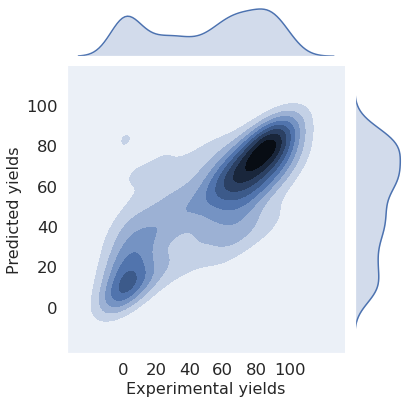

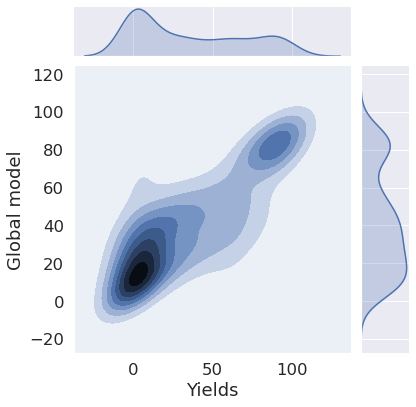

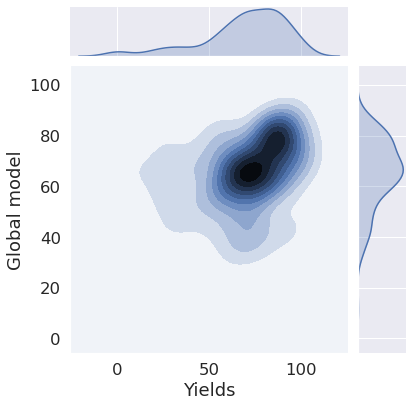

In [433]:
sns.set(font_scale=1.5)
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Global model", df_2, kind='kde')
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_fp_descriptors_test_size_0.2_full_mechanism_suzuki.png')
fig_paths.append('images/random_split_fp_descriptors_test_size_0.2_full_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))


indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_2_optimisation, kind='kde')
plt.savefig('images/random_split_fp_descriptors_test_size_0.2_optimisation_mechanism_suzuki.png')
fig_paths.append('images/random_split_fp_descriptors_test_size_0.2_optimisation_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Global model"]))

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_2_scope, kind='kde')
plt.savefig('images/random_split_fp_descriptors_test_size_0.2_scope_mechanism_suzuki.png')
fig_paths.append('images/random_split_fp_descriptors_test_size_0.2_scope_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Global model"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Global model"]))

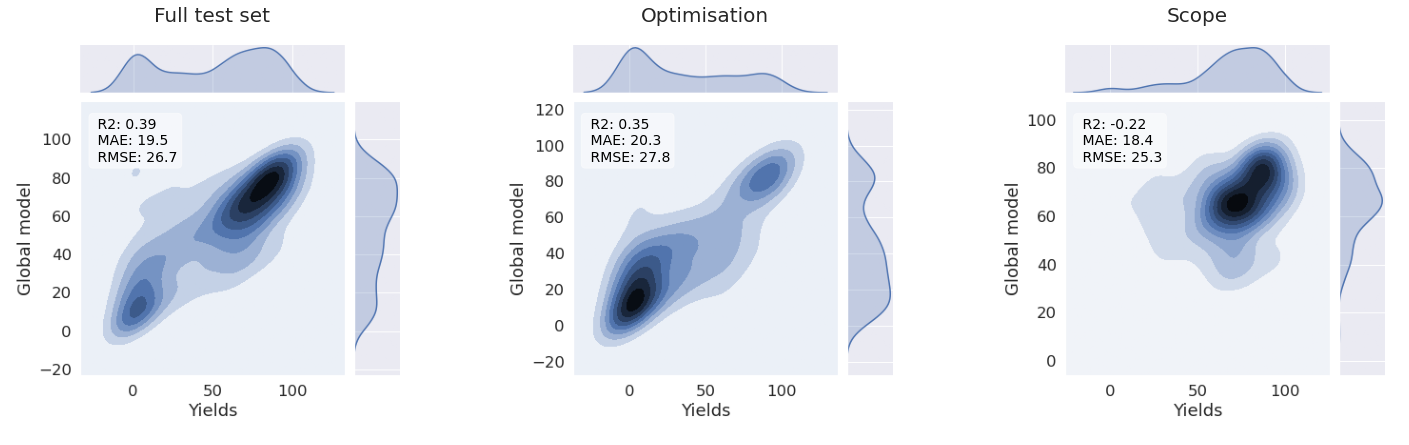

In [238]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(90, 140, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=25, fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


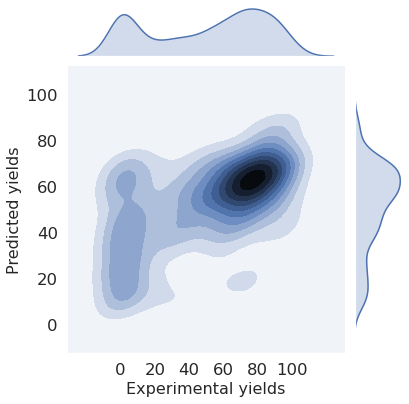

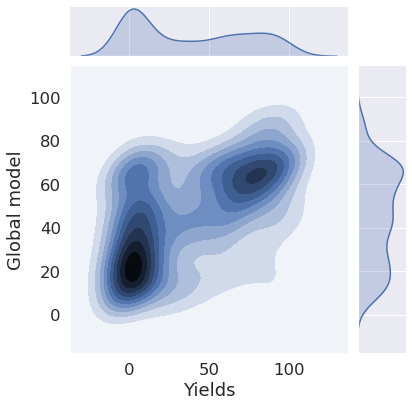

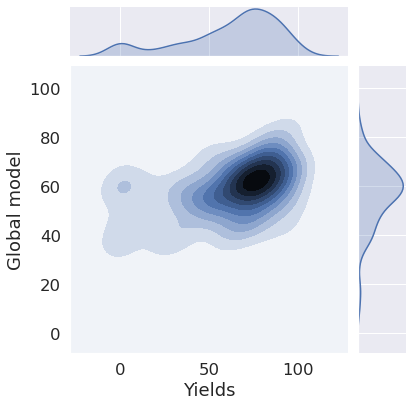

In [434]:
sns.set(font_scale=1.5)
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Global model", df_3, kind='kde')
h.set_axis_labels('Experimental yields', 'Predicted yields', fontsize=16)
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('images/random_split_rxnfp_descriptors_test_size_0.2_full_mechanism_suzuki.png')
fig_paths.append('images/random_split_rxnfp_descriptors_test_size_0.2_full_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_3["Yields"], df_3["Global model"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Global model"]))
r2.append(r2_score(df_3["Yields"], df_3["Global model"]))


indices = np.where(df_3['Origin'] == "Optimisation")
df_3_optimisation = df_3[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_3_optimisation, kind='kde')
plt.savefig('images/random_split_rxnfp_descriptors_test_size_0.2_optimisation_mechanism_suzuki.png')
fig_paths.append('images/random_split_rxnfp_descriptors_test_size_0.2_optimisation_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_3_optimisation["Yields"], df_3_optimisation["Global model"])**0.5)
mae.append(mean_absolute_error(df_3_optimisation["Yields"], df_3_optimisation["Global model"]))
r2.append(r2_score(df_3_optimisation["Yields"], df_3_optimisation["Global model"]))

indices = np.where(df_3['Origin'] == "Scope")
df_3_scope = df_3[["Yields", "Global model"]].iloc[indices]
sns.jointplot("Yields", "Global model", df_3_scope, kind='kde')
plt.savefig('images/random_split_rxnfp_descriptors_test_size_0.2_scope_mechanism_suzuki.png')
fig_paths.append('images/random_split_rxnfp_descriptors_test_size_0.2_scope_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_3_scope["Yields"], df_3_scope["Global model"])**0.5)
mae.append(mean_absolute_error(df_3_scope["Yields"], df_3_scope["Global model"]))
r2.append(r2_score(df_3_scope["Yields"], df_3_scope["Global model"]))

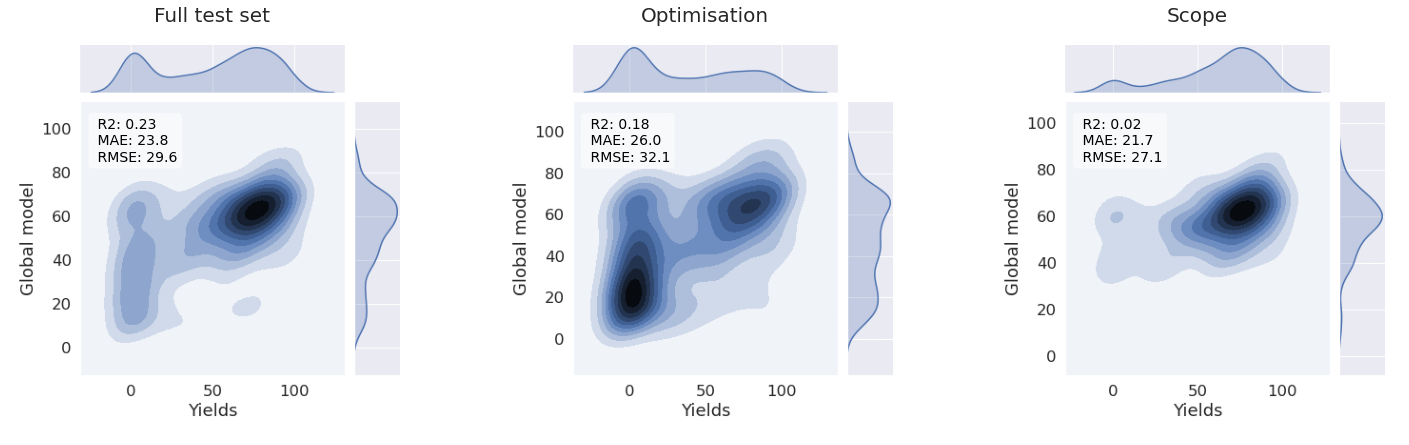

In [240]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_3['Origin'] == "Optimisation")
df_3_optimisation = df_3[["Yields", "Global model"]].iloc[indices]

indices = np.where(df_3['Origin'] == "Scope")
df_3_scope = df_3[["Yields", "Global model"]].iloc[indices]

origins = ["Full test set", "Optimisation", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(90, 140, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=25, fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


In [435]:
fig_paths = []
rmse = []
mae = []
r2 = []

fig_paths.append('images/random_split_fp_descriptors_test_size_0.2_full_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Global model"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Global model"]))
r2.append(r2_score(df_1["Yields"], df_1["Global model"]))


fig_paths.append('images/random_split_dft_descriptors_test_size_0.2_full_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Global model"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Global model"]))
r2.append(r2_score(df_2["Yields"], df_2["Global model"]))

fig_paths.append('images/random_split_rxnfp_descriptors_test_size_0.2_full_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_3["Yields"],df_3["Global model"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Global model"]))
r2.append(r2_score(df_3["Yields"], df_3["Global model"]))


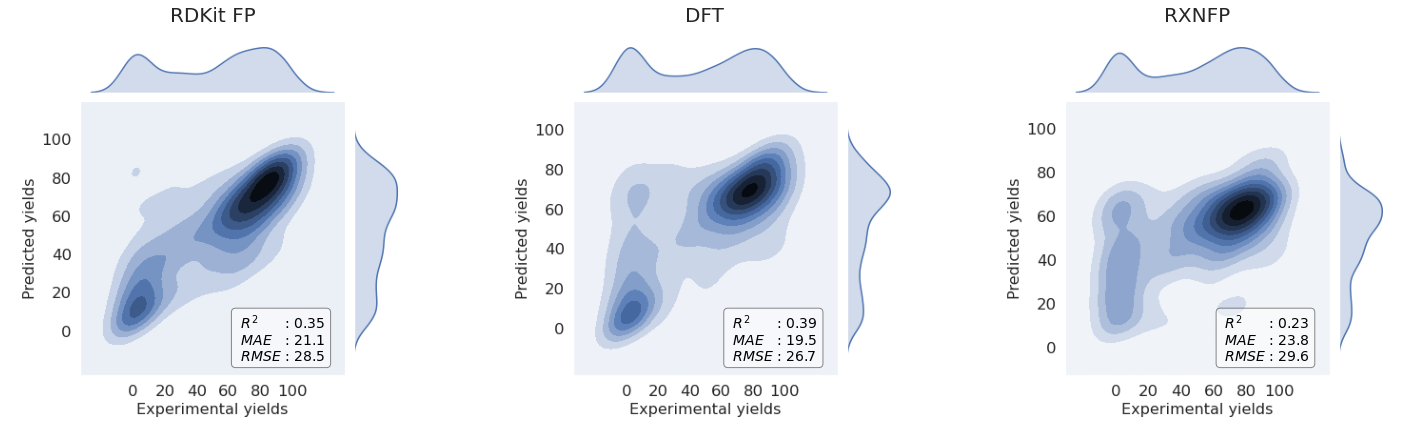

In [436]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    text = ax.text(240, 350, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=25, fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))